In [3]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Data.csv")

In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
print("shape of training dataset:", data.shape)

shape of training dataset: (506, 14)


In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<AxesSubplot:>

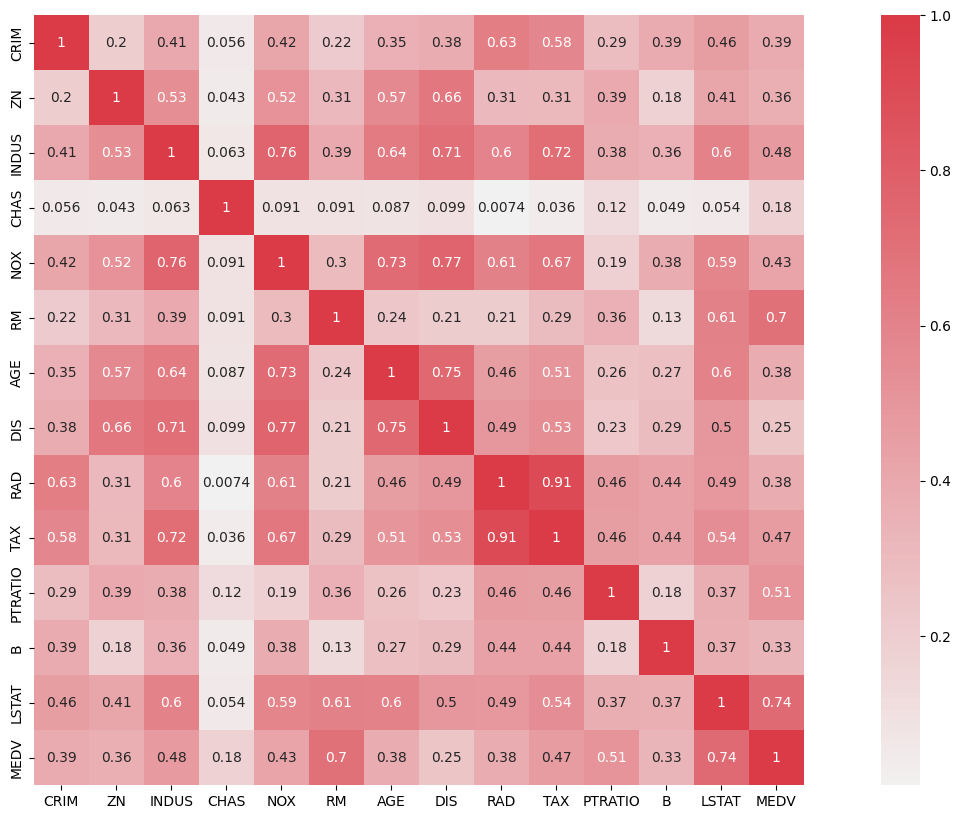

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(data.corr().abs(), cmap=cmap, center=0, square=True, annot=True,)

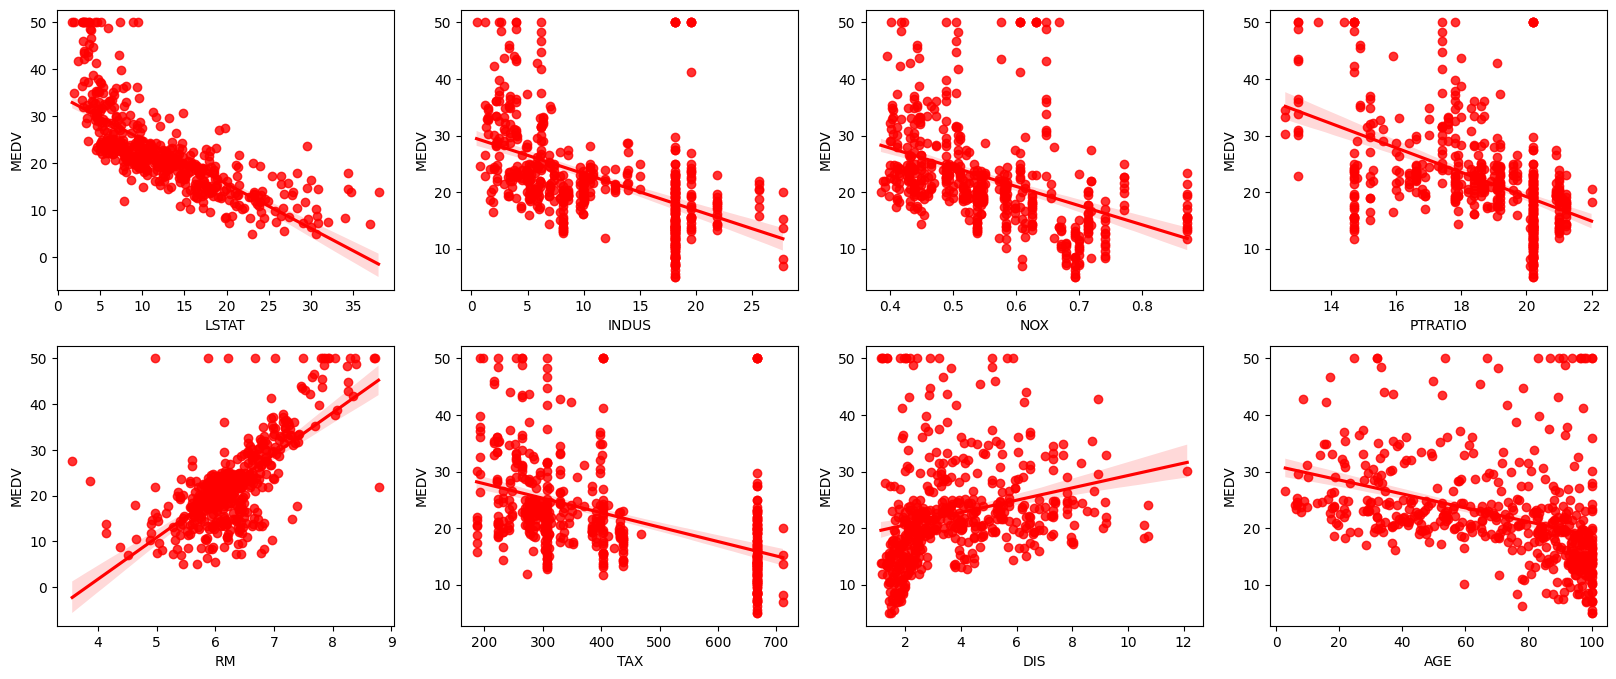

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,8))
cols = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
for cols, ax in zip(cols, axs.flat):
    sns.regplot(x=data[cols], y=data['MEDV'], color='red', ax=ax)

In [11]:
X= data.iloc[:,:-1].values

In [12]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

IndexError: index 8 is out of bounds for axis 0 with size 8

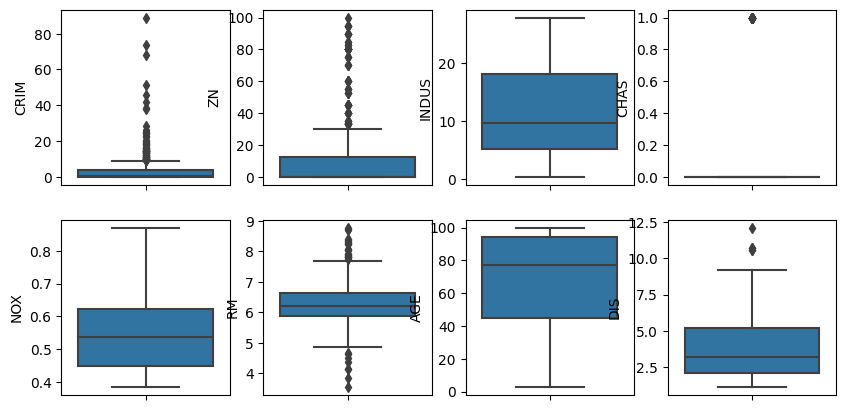

In [12]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k, v in data.items():
    sns.boxplot(y=k, data = data, ax = axs)
    index+= 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [13]:
data = data[~((data['RM'] >= 8.5) | ( data['RM'] < 4))]

In [14]:
#Model Implementation
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
target = data['MEDV']
features = data.drop('MEDV', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)
#baseline SVR model
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)

0.5375886915789694

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
K = 15
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9], 'C': [1,10,100,1000,10000]}]
print("Tuning hyper-parameters")
scorer = make_scorer(mean_squared_error, greater_is_better=False)
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=scorer)
svr.fit(X_train, Y_train)
print("Grid scores on tarining set:")
means = svr.cv_results_['mean_test_score']
stds = svr.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std*2, params))

Tuning hyper-parameters
Grid scores on tarining set:
-85.213 (+/-58.621) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
-83.651 (+/-58.737) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-71.612 (+/-58.106) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-47.762 (+/-53.476) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-40.061 (+/-47.361) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
-32.269 (+/-40.115) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
-31.161 (+/-39.062) for {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
-30.073 (+/-37.764) for {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
-83.647 (+/-58.737) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-71.431 (+/-58.157) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-45.173 (+/-52.900) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
-23.249 (+/-34.836) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
-18.744 (+/-30.400) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
-15.156 (+/-26.167) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
-14.959 (+/-25.660) for {'C': 10,

In [16]:
regressor_tuned = SVR(kernel = 'rbf', C = 1000, gamma = 0.9)
regressor_tuned.fit(X_train, Y_train)
regressor_tuned.score(X_test, Y_test)

0.7908188998203709

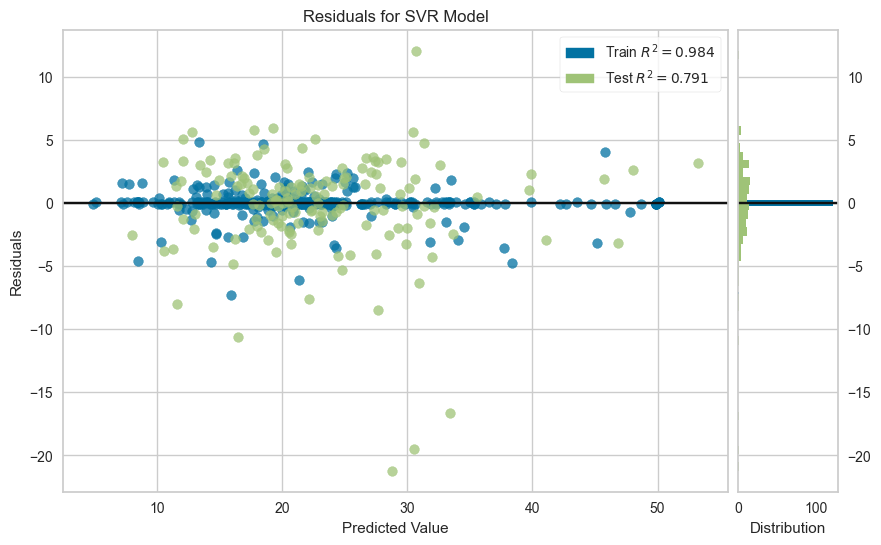

In [18]:
from yellowbrick.regressor import ResidualsPlot
plt.figure(figsize=(10,6))
visualizer = ResidualsPlot(regressor_tuned)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show();